# Random Walks With Reinforcement

**M 375T Experimental Mathematics Final Project**

**Carrie Liang (sl54435)**

### Imports

In [1]:
# For data structures
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Functions are stored in a separate file to improve readability here
from randomwalk_functions import *

### Basic Examples

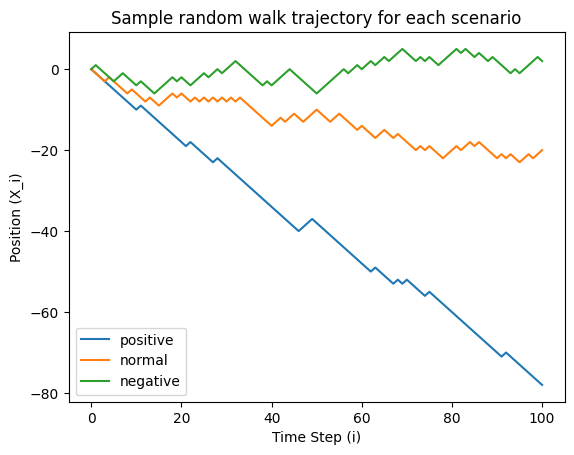

In [11]:
if __name__ == "__main__":

    # Plot a positive RW

    walk = generate_1d_walk_positive(num_steps = 100)
    x_values = list(range(101))
    y_values = walk

    plt.plot(x_values, y_values, label="positive")

    # Plot a normal RW

    walk = generate_1d_walk(num_steps = 100)
    x_values = list(range(101))
    y_values = walk

    plt.plot(x_values, y_values, label = "normal")

    # Plot a negative RW

    walk = generate_1d_walk_negative(num_steps = 100)
    x_values = list(range(101))
    y_values = walk

    plt.plot(x_values, y_values, label = "negative")

    plt.title("Sample random walk trajectory for each scenario")
    plt.xlabel("Time Step (i)")
    plt.ylabel("Position (X_i)")

    plt.legend()


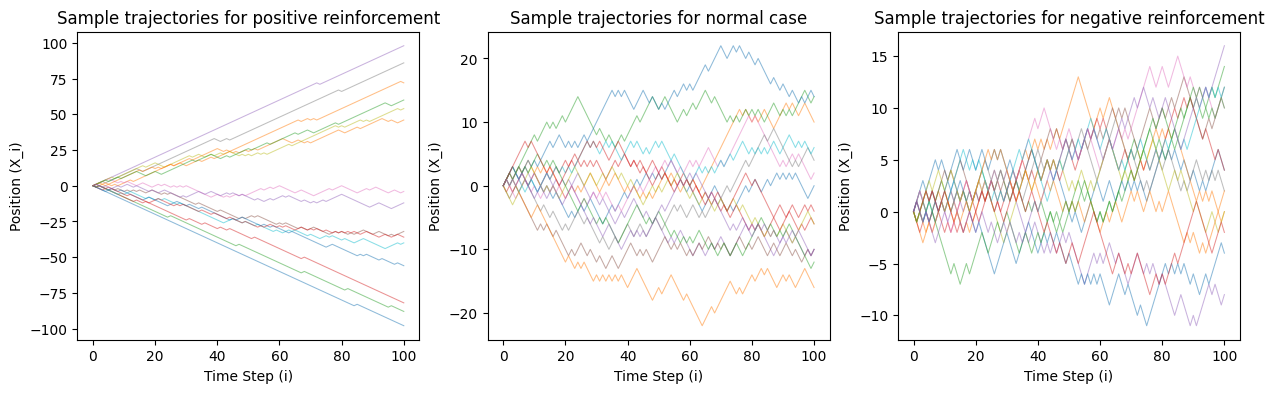

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

for i in range(15):
    walk = generate_1d_walk_positive(num_steps = 100)

    x_values = list(range(101))
    y_values = walk

    axes[0].plot(x_values, y_values, linewidth=0.75, alpha = 0.5)
axes[0].set_title("Sample trajectories for positive reinforcement")
axes[0].set_xlabel("Time Step (i)")
axes[0].set_ylabel("Position (X_i)")

for i in range(15):
    walk = generate_1d_walk(num_steps = 100)

    x_values = list(range(101))
    y_values = walk

    axes[1].plot(x_values, y_values, linewidth=0.75, alpha = 0.5)
axes[1].set_title("Sample trajectories for normal case")
axes[1].set_xlabel("Time Step (i)")
axes[1].set_ylabel("Position (X_i)")

for i in range(15):
    walk = generate_1d_walk_negative(num_steps = 100)

    x_values = list(range(101))
    y_values = walk

    axes[2].plot(x_values, y_values, linewidth=0.75, alpha = 0.5)
axes[2].set_title("Sample trajectories for negative reinforcement")
axes[2].set_xlabel("Time Step (i)")
axes[2].set_ylabel("Position (X_i)")

plt.show()

## Investigating 1D

### 1D Model - Symmetric

How to think of a random walk with reinforcement in 1D?

- trajectory is a list of numbers [0, 1, 2, 1, 0, -1, 0, ...]


### What is the distribution of particle locations after T steps?

In [16]:
positive_1d_walks = generate_many_walks(num_walks=10_000, num_steps=10_000, type="positive")
normal_1d_walks = generate_many_walks(num_walks=10_000, num_steps=10_000, type="normal")
negative_1d_walks = generate_many_walks(num_walks=10_000, num_steps=10_000, type="negative")

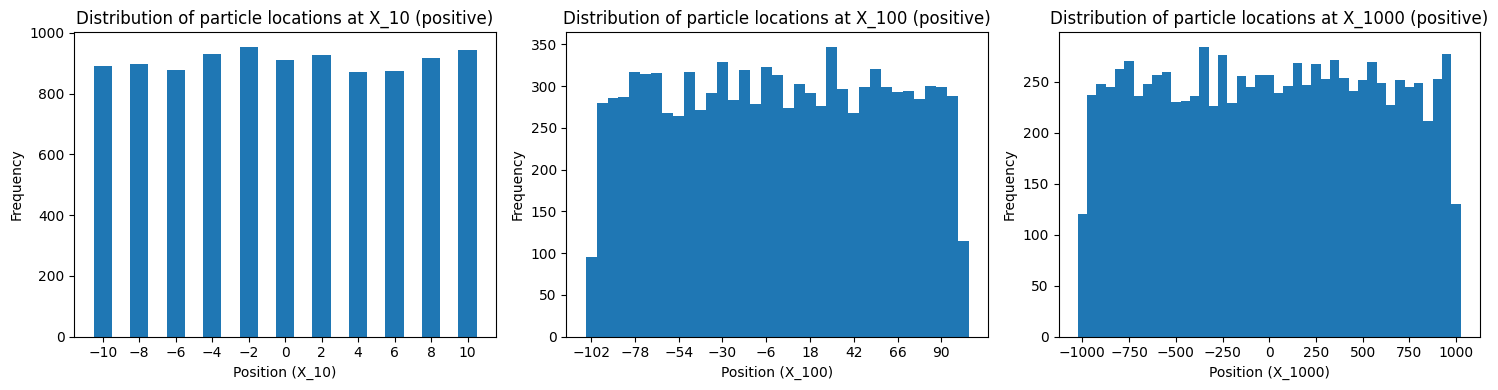

In [62]:
def make_bins_centered(data, bin_width):
    """Given data and a bin width, returns bin edges and bin centers."""
    data_min = np.min(data)
    data_max = np.max(data)
    
    # First get bin centers covering data
    centers = np.arange(
        np.floor(data_min / bin_width) * bin_width,
        np.ceil(data_max / bin_width) * bin_width + bin_width,
        bin_width
    )
    
    # Then get bin edges by shifting left/right
    edges = centers - bin_width/2
    edges = np.append(edges, edges[-1] + bin_width)
    
    return edges, centers


### Plot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# First dataset
bins_10, centers_10 = make_bins_centered(positive_1d_walks["X_10"], bin_width=1)
axes[0].hist(positive_1d_walks["X_10"], bins=bins_10)
axes[0].set_xticks(centers_10[::2])
axes[0].set_title("Distribution of particle locations at X_10 (positive)")
axes[0].set_xlabel("Position (X_10)")
axes[0].set_ylabel("Frequency")

# Second dataset
bins_100, centers_100 = make_bins_centered(positive_1d_walks["X_100"], bin_width=6)
axes[1].hist(positive_1d_walks["X_100"], bins=bins_100)
axes[1].set_xticks(centers_100[::4])
axes[1].set_title("Distribution of particle locations at X_100 (positive)")
axes[1].set_xlabel("Position (X_100)")
axes[1].set_ylabel("Frequency")


# Third dataset
bins_1000, centers_1000 = make_bins_centered(positive_1d_walks["X_1000"], bin_width=50)
axes[2].hist(positive_1d_walks["X_1000"], bins=bins_1000)
axes[2].set_xticks(centers_1000[::5])
axes[2].set_title("Distribution of particle locations at X_1000 (positive)")
axes[2].set_xlabel("Position (X_1000)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


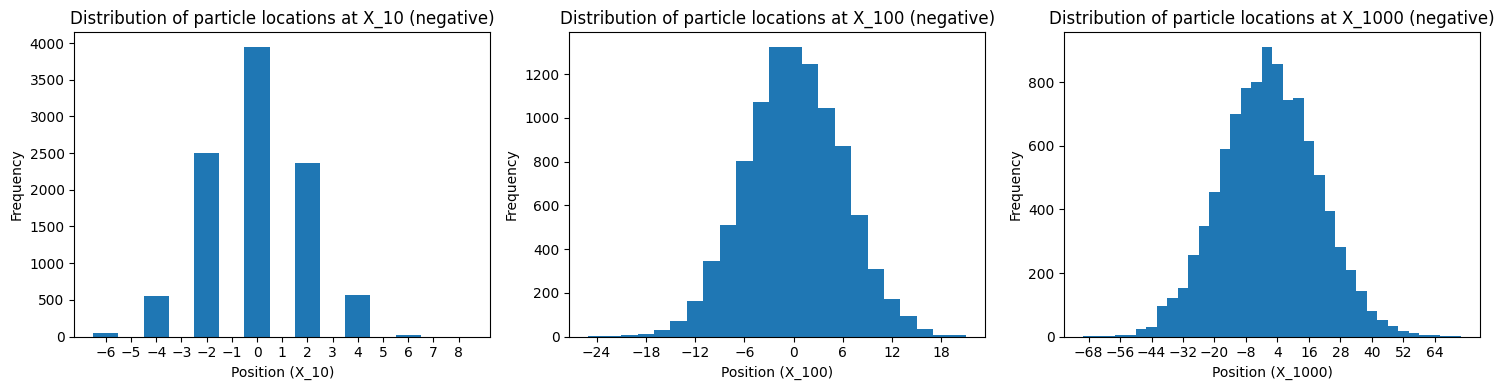

In [59]:
### Plot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# First dataset
bins_10, centers_10 = make_bins_centered(negative_1d_walks["X_10"], bin_width=1)
axes[0].hist(negative_1d_walks["X_10"], bins=bins_10)
axes[0].set_xticks(centers_10)
axes[0].set_title("Distribution of particle locations at X_10 (negative)")
axes[0].set_xlabel("Position (X_10)")
axes[0].set_ylabel("Frequency")

# Second dataset
bins_100, centers_100 = make_bins_centered(negative_1d_walks["X_100"], bin_width=2)
axes[1].hist(negative_1d_walks["X_100"], bins=bins_100)
axes[1].set_xticks(centers_100[::3])
axes[1].set_title("Distribution of particle locations at X_100 (negative)")
axes[1].set_xlabel("Position (X_100)")
axes[1].set_ylabel("Frequency")


# Third dataset
bins_1000, centers_1000 = make_bins_centered(negative_1d_walks["X_1000"], bin_width=4)
axes[2].hist(negative_1d_walks["X_1000"], bins=bins_1000)
axes[2].set_xticks(centers_1000[::3])
axes[2].set_title("Distribution of particle locations at X_1000 (negative)")
axes[2].set_xlabel("Position (X_1000)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

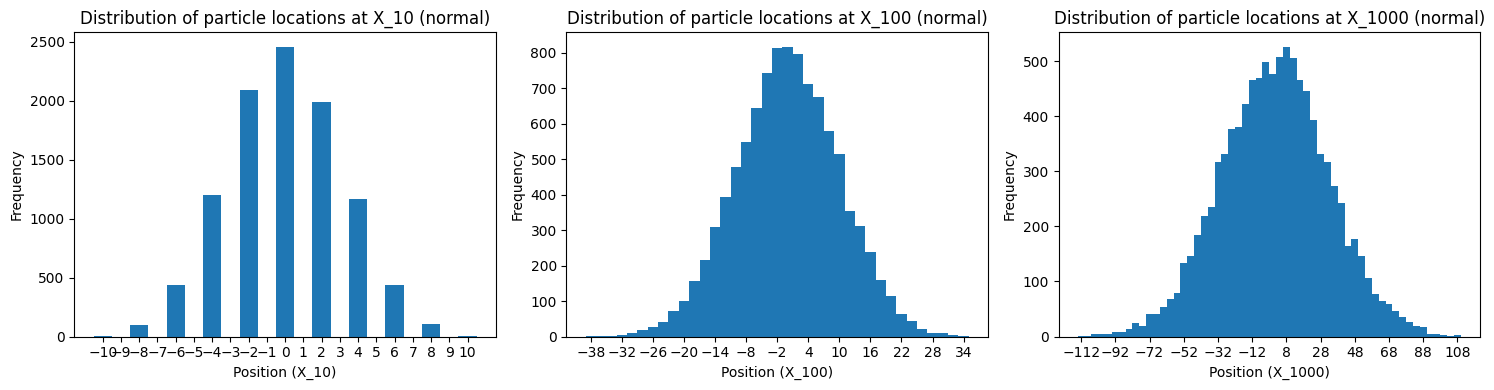

In [65]:
### Plot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# First dataset
bins_10, centers_10 = make_bins_centered(normal_1d_walks["X_10"], bin_width=1)
axes[0].hist(normal_1d_walks["X_10"], bins=bins_10)
axes[0].set_xticks(centers_10)
axes[0].set_title("Distribution of particle locations at X_10 (normal)")
axes[0].set_xlabel("Position (X_10)")
axes[0].set_ylabel("Frequency")

# Second dataset
bins_100, centers_100 = make_bins_centered(normal_1d_walks["X_100"], bin_width=2)
axes[1].hist(normal_1d_walks["X_100"], bins=bins_100)
axes[1].set_xticks(centers_100[::3])
axes[1].set_title("Distribution of particle locations at X_100 (normal)")
axes[1].set_xlabel("Position (X_100)")
axes[1].set_ylabel("Frequency")


# Third dataset
bins_1000, centers_1000 = make_bins_centered(normal_1d_walks["X_1000"], bin_width=4)
axes[2].hist(normal_1d_walks["X_1000"], bins=bins_1000)
axes[2].set_xticks(centers_1000[::5])
axes[2].set_title("Distribution of particle locations at X_1000 (normal)")
axes[2].set_xlabel("Position (X_1000)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Variance across time

In [70]:
# get data of the standard deviation, pandas .std() function does that easily
positive_std_list = positive_1d_walks.std().tolist()
normal_std_list = normal_1d_walks.std().tolist()
negative_std_list = negative_1d_walks.std().tolist()

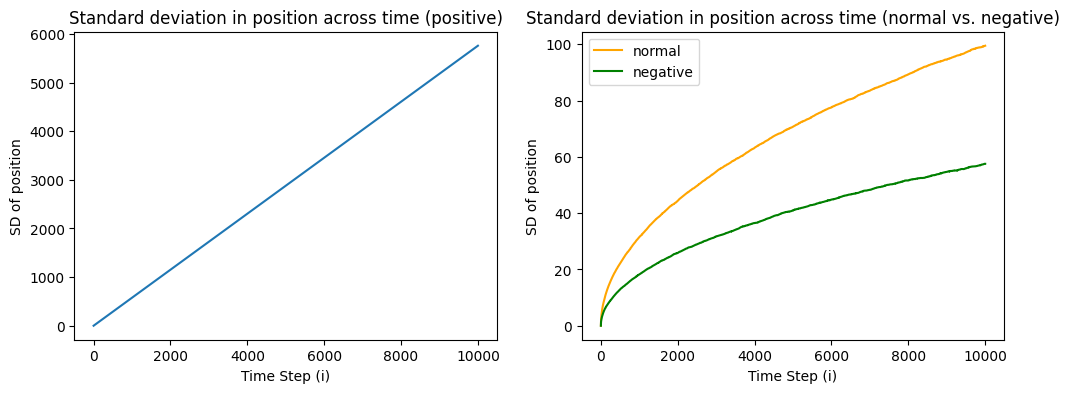

In [73]:
# plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 

axes[0].plot(range(0,10001), positive_std_list)
axes[0].set_title("Standard deviation in position across time (positive)")
axes[0].set_xlabel("Time Step (i)")
axes[0].set_ylabel("SD of position")

axes[1].plot(range(0,10001), normal_std_list, label = "normal", color = "orange")
axes[1].plot(range(0,10001), negative_std_list, label = "negative", color = "green")
axes[1].set_title("Standard deviation in position across time (normal vs. negative)")
axes[1].set_xlabel("Time Step (i)")
axes[1].set_ylabel("SD of position")

plt.legend()


See how strength factor and time step math with standard deviation. There are two variables so we will have to have time step on the x-axis, strength factor on the y-axis, and use color to denote standard deviation. 

I think the code will take a long time to run so we have to cut down on some stuff:
- test for k in range(0,5) in step size 0.5
- simulate up to time 3000
- for each thing, just get statistics from 100 trajectories

In [77]:
from randomwalk_functions_strengthfactor import *

In [95]:
# Let's first try to do the positive case

delta = 0.25
num_walks = 1000
num_steps = 2000

data_list = [generate_many_walks(num_walks, num_steps, type = "positive", k=k) for k in np.arange(delta, 5 + delta, delta)]
std_list = [df.std().tolist() for df in data_list]

In [96]:
df = pd.DataFrame(std_list)
df = df.set_index(np.arange(delta, 5 + delta, delta))
df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0.25,0.0,1.000500,1.483976,1.931395,2.343243,2.717591,3.064276,3.435070,3.753997,4.126915,...,672.937121,673.240218,673.591385,673.959045,674.298503,674.670597,675.017500,675.356467,675.692963,675.983064
0.50,0.0,1.000338,1.553775,2.048437,2.545084,2.994711,3.413991,3.847961,4.315811,4.803235,...,889.691249,890.144392,890.550579,891.024161,891.446526,891.879921,892.278019,892.714778,893.143296,893.575863
0.75,0.0,1.000162,1.609251,2.164079,2.718473,3.241977,3.752000,4.302644,4.825225,5.339726,...,1036.935794,1037.445839,1037.968033,1038.460661,1038.927821,1039.435029,1039.947454,1040.481118,1040.964960,1041.465348
1.00,0.0,1.000258,1.632287,2.254828,2.855803,3.460461,4.055335,4.655682,5.248819,5.817064,...,1166.664486,1167.268253,1167.884207,1168.483728,1169.104353,1169.698528,1170.290788,1170.866150,1171.467240,1172.060249
1.25,0.0,1.000108,1.653965,2.308942,2.969630,3.603455,4.248723,4.859114,5.500980,6.116017,...,1257.487843,1258.106305,1258.768396,1259.396595,1260.021868,1260.686975,1261.292530,1261.905442,1262.520271,1263.132891
1.50,0.0,1.000468,1.695527,2.377599,3.016787,3.670500,4.342697,5.047836,5.754669,6.393589,...,1312.442068,1313.106473,1313.772331,1314.433017,1315.088705,1315.742396,1316.374605,1317.046904,1317.722171,1318.385935
1.75,0.0,0.999778,1.747156,2.414065,3.131140,3.839511,4.531704,5.197210,5.895983,6.587494,...,1401.342892,1402.028156,1402.727783,1403.466560,1404.163425,1404.860751,1405.559484,1406.258098,1406.962327,1407.675348
2.00,0.0,0.996794,1.731798,2.429442,3.132877,3.826775,4.554777,5.282052,5.999258,6.715353,...,1410.735385,1411.435656,1412.153722,1412.861209,1413.562871,1414.285556,1414.976035,1415.682569,1416.392645,1417.127318
2.25,0.0,0.998816,1.759260,2.508868,3.275535,4.003594,4.732485,5.464363,6.163529,6.922037,...,1471.698159,1472.429820,1473.153410,1473.908393,1474.665690,1475.386455,1476.115354,1476.852805,1477.580984,1478.314699
2.50,0.0,1.000482,1.762408,2.494271,3.264701,4.004337,4.765723,5.517594,6.240038,6.940929,...,1466.526420,1467.260894,1467.997657,1468.726829,1469.464059,1470.209096,1470.948742,1471.666992,1472.424476,1473.149845


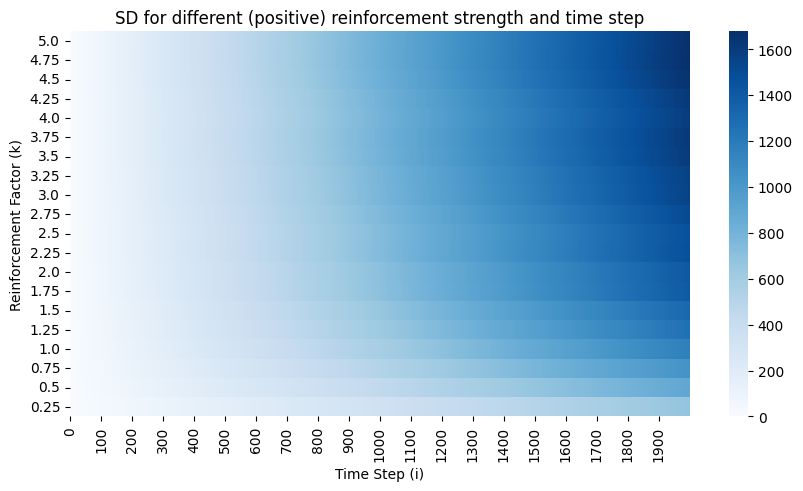

In [97]:
# Create plot
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df, ax=ax, cmap="Blues")

# Set x-tick labels
ax.set_xticks(np.arange(0,2000,100))  # Center labels on bins
ax.set_xticklabels(np.arange(0,2000,100))
ax.invert_yaxis()   # so (0,0) origin aligns with what we are used to

plt.title("SD for different (positive) reinforcement strength and time step")
plt.xlabel("Time Step (i)")
plt.ylabel("Reinforcement Factor (k)")
plt.show()

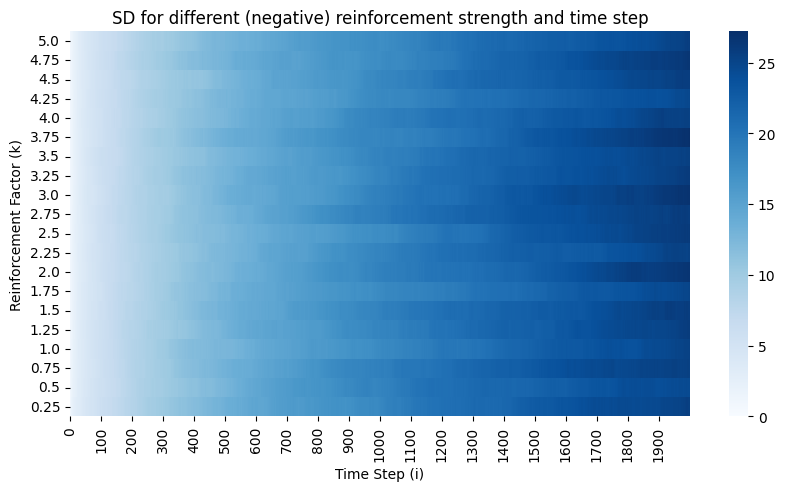

In [98]:
# Replicate for the negative case

delta = 0.25
num_walks = 1000
num_steps = 2000

data_list = [generate_many_walks(num_walks, num_steps, type = "negative", k=k) for k in np.arange(delta, 5 + delta, delta)]
std_list = [df.std().tolist() for df in data_list]

df = pd.DataFrame(std_list)
df = df.set_index(np.arange(delta, 5 + delta, delta))

# Create plot
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df, ax=ax, cmap="Blues")

# Set x-tick labels
ax.set_xticks(np.arange(0,2000,100))  # Center labels on bins
ax.set_xticklabels(np.arange(0,2000,100))
ax.invert_yaxis()   # so (0,0) origin aligns with what we are used to

plt.title("SD for different (negative) reinforcement strength and time step")
plt.xlabel("Time Step (i)")
plt.ylabel("Reinforcement Factor (k)")
plt.show()

In [110]:
# get best_fit line
coefficients = np.polyfit(range(0,10001), positive_std_list, 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

0.5756672732620538 0.4433126951108591


In [112]:
coefficients = np.polyfit(np.log(range(1,10001)), np.log(negative_std_list[1:]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

0.49743456270943465 -0.5272767971252305


### Next on our list: probability of returning to the origin

Text(0, 0.5, 'Frequency')

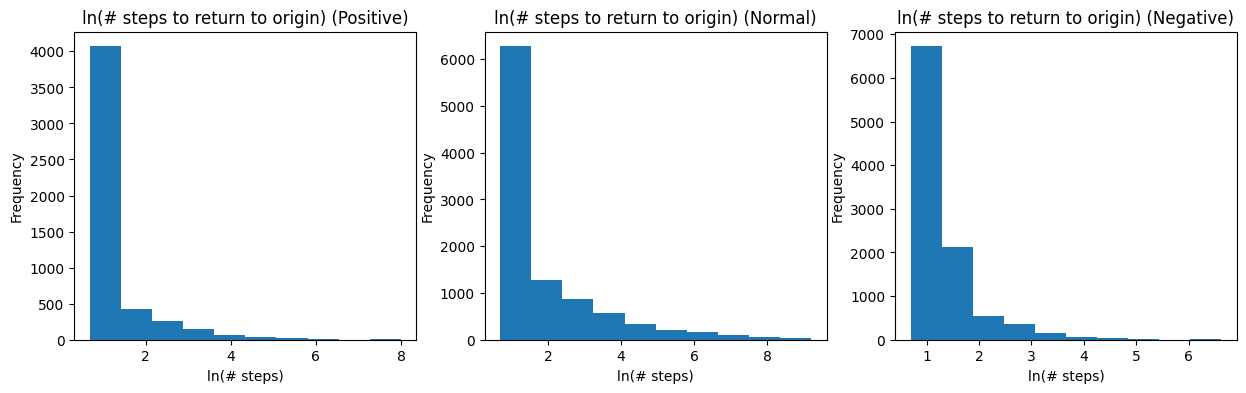

In [101]:
# get data of number of steps it takes to return to the origin
first_match_indices_pos1d = positive_1d_walks.apply(lambda row: first_match_index(row, positive_1d_walks), axis=1)
first_match_indices_pos1d = first_match_indices_pos1d.dropna()

first_match_indices_normal1d = normal_1d_walks.apply(lambda row: first_match_index(row, normal_1d_walks), axis=1)
first_match_indices_normal1d = first_match_indices_normal1d.dropna()

first_match_indices_neg1d = negative_1d_walks.apply(lambda row: first_match_index(row, negative_1d_walks), axis=1)
first_match_indices_neg1d = first_match_indices_neg1d.dropna()

# plot the results as histograms

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

axes[0].hist(np.log(first_match_indices_pos1d))
axes[0].set_title("ln(# steps to return to origin) (Positive)")
axes[0].set_xlabel("ln(# steps)")
axes[0].set_ylabel("Frequency")

axes[1].hist(np.log(first_match_indices_normal1d))
axes[1].set_title("ln(# steps to return to origin) (Normal)")
axes[1].set_xlabel("ln(# steps)")
axes[1].set_ylabel("Frequency")

axes[2].hist(np.log(first_match_indices_neg1d))
axes[2].set_title("ln(# steps to return to origin) (Negative)")
axes[2].set_xlabel("ln(# steps)")
axes[2].set_ylabel("Frequency")

In [108]:
def prop_returned_by_time(first_match_indices, total_num_walks):
    """
    Given a Series returned from first_match_index(), return a list that holds the proportion of walks 
    that have returned to the origin by time i.
    """

    # Get the maximum index at which the origin was travelled back to, to capture all possibilities, but
    # avoid having to search through unnecessary extra steps
    max_val = max(first_match_indices)

    # This is adding 1 to the counter if the first match index is less than each natural number up to max_val
    # In other words, getting the number of walks which have returned for the first time by each natural number index
    # and then converting that into a proportion
    result = [sum(1 for x in first_match_indices if x < i)/total_num_walks for i in range(int(max_val) + 1)]

    return result

In [ ]:
# plot return probability as a function of time

result_positive = prop_returned_by_time(first_match_indices_pos1d, 10000)
result_normal = prop_returned_by_time(first_match_indices_normal1d, 10000)
result_negative = prop_returned_by_time(first_match_indices_neg1d, 10000)

Text(0, 0.5, 'Proportion of walks')

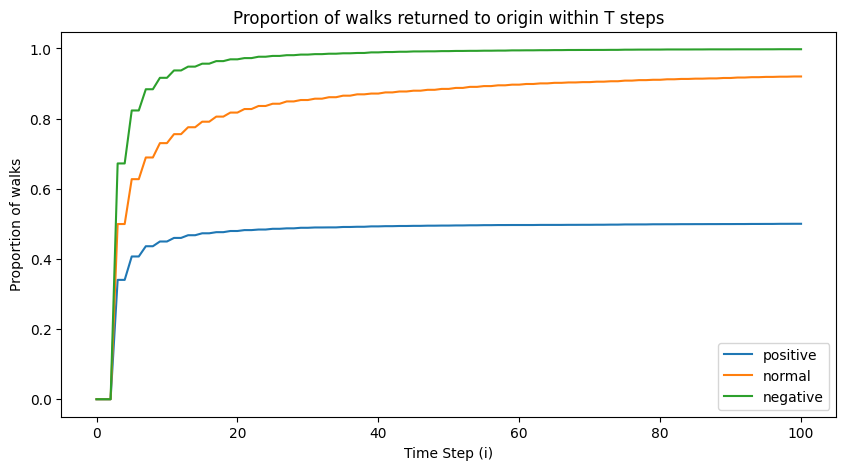

In [157]:
plt.figure(figsize=(10,5))
plt.plot(result_positive[:101], label="positive")
plt.plot(result_normal[:101], label="normal")
plt.plot(result_negative[:101], label="negative")
plt.legend()
plt.title("Proportion of walks returned to origin within T steps")
plt.xlabel("Time Step (i)")
plt.ylabel("Proportion of walks")

In [156]:
## get power law distributions

# get best_fit line - positive
coefficients = np.polyfit(np.log(range(3,101)), np.log(result_positive[3:101]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

# get best_fit line - normal
coefficients = np.polyfit(np.log(range(3,101)), np.log(result_normal[3:101]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

# get best_fit line - negative
coefficients = np.polyfit(np.log(range(3,101)), np.log(result_negative[3:101]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)


0.0662664058203428 -0.9698462327321156
0.1256126988592774 -0.6227368017830195
0.0619443307265942 -0.2572735357245551


### Number of returns to the origin

Text(0, 0.5, 'Density')

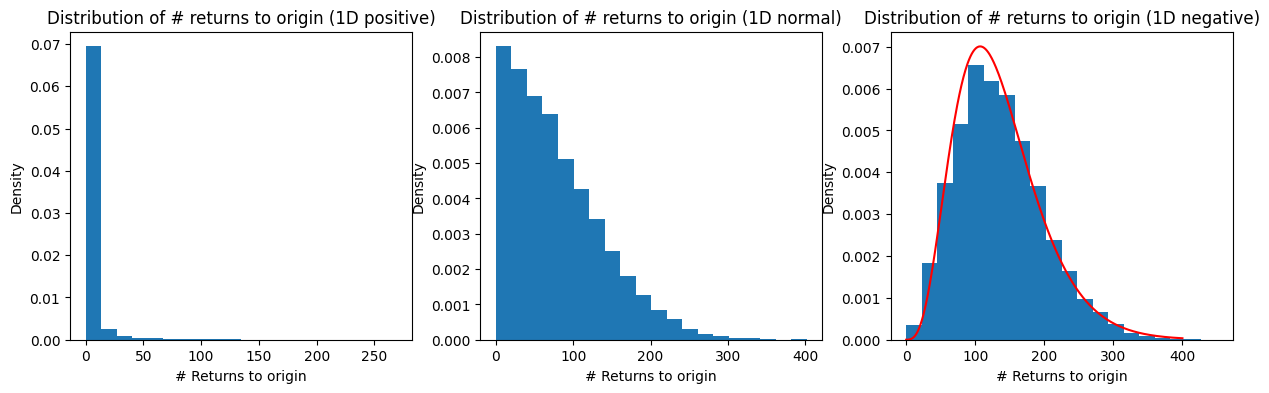

In [261]:
import scipy.stats as st

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

zero_count_pos = (positive_1d_walks.iloc[:, 1:] == 0).sum(axis=1)
axes[0].hist(zero_count_pos, bins=20, density=True)
axes[0].set_title("Distribution of # returns to origin (1D positive)")
axes[0].set_xlabel("# Returns to origin")
axes[0].set_ylabel("Density")

##################

zero_count_normal = (normal_1d_walks.iloc[:, 1:] == 0).sum(axis=1)
axes[1].hist(zero_count_normal, bins=20, density=True)
axes[1].set_title("Distribution of # returns to origin (1D normal)")
axes[1].set_xlabel("# Returns to origin")
axes[1].set_ylabel("Density")

#################333

zero_count_neg = (negative_1d_walks.iloc[:, 1:] == 0).sum(axis=1)
axes[2].hist(zero_count_neg, bins=20, density=True)
## plot the negative binomial approximation
# Calculate mean and variance of the data
mean = np.mean(zero_count_neg)
variance = np.var(zero_count_neg)

# Estimate n and p from mean and variance
n = mean**2 / (variance - mean)
p = mean / variance
# Create a range for x values (integer values)
x_plot = np.arange(0, 401)
axes[2].plot(x_plot, st.nbinom.pmf(x_plot, n=n, p=p), label="Negative Binomial", color="red")

axes[2].set_title("Distribution of # returns to origin (1D negative)")
axes[2].set_xlabel("# Returns to origin")
axes[2].set_ylabel("Density")

In [192]:
print(n,p)

4.866109334550618 0.03467709909586073


In [293]:
zero_count_neg = (negative_1d_walks.iloc[:, 1:] == 0).sum(axis=1)
zero_count_neg.describe()

count    10000.000000
mean       135.460200
std         62.503767
min          0.000000
25%         90.000000
50%        129.000000
75%        174.000000
max        450.000000
dtype: float64

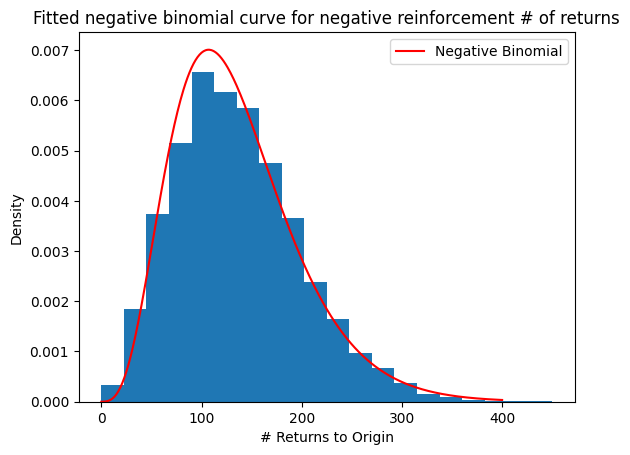

In [187]:



# Calculate mean and variance of the data
mean = np.mean(zero_count_neg)
variance = np.var(zero_count_neg)

# Estimate n and p from mean and variance
n = mean**2 / (variance - mean)
p = mean / variance

# Create a range for x values (integer values)
x_plot = np.arange(0, 401)

# Plot the PMF for the fitted negative binomial distribution
plt.hist(zero_count_neg, density=True, bins=20)
plt.plot(x_plot, st.nbinom.pmf(x_plot, n=n, p=p), label="Negative Binomial", color="red")
plt.xlabel("# Returns to Origin")
plt.ylabel("Density")
plt.title("Fitted negative binomial curve for negative reinforcement # of returns")
plt.legend()
plt.show()

In [148]:
## get proportion which actually returned within 10000 steps

print(len(first_match_indices_pos1d)/10000)
print(len(first_match_indices_normal1d)/10000)
print(len(first_match_indices_neg1d)/10000)

0.5054
0.9907
0.9999


## Investigating 2D

In [231]:
# Generate a lot of 1D walks
def generate_many_walks_2d(num_walks, num_steps, type):

    """
    Generate num_walks number of trajectories with num_steps, of a specified type.
    `type` can take: ["normal", "positive", "negative"]
    Output: DataFrame
    """

    # Dimensions
    # num_walks is the number of rows (each row is a RW trajectory)
    # num_steps+1 is the number of columns (each column is a step)

    if type == "normal":
        trajectories = [generate_2d_walk(num_steps) for _ in range(num_walks)]
    elif type == "positive":
        trajectories = [generate_2d_walk_positive(num_steps) for _ in range(num_walks)]
    elif type == "negative":
        trajectories = [generate_2d_walk_negative(num_steps) for _ in range(num_walks)]

    # Convert to DataFrame
    columns = [f'X_{i}' for i in range(num_steps+1)]
    df = pd.DataFrame(trajectories, columns=columns)

    return df

In [29]:
from randomwalk_functions import *

In [266]:
positive_2d_walks = generate_many_walks_2d(num_walks=5_000, num_steps=10_000, type="positive")

In [235]:
def generate_2d_walk(num_steps = 1_000):

    """
    Generates a 2D symmetric random walk.
    Input: num_steps
    Output: trajectory (as a 1D array of coordinates)
    """

    # Initialize trajectory
    trajectory = [np.array([0,0])] * (num_steps+1)
    directions = np.array([[0,-1], [0,1], [1,0], [-1,0]])
    probabilities = np.array([1/4, 1/4, 1/4, 1/4])
    curr = np.array([0,0])

    for i in range(1, num_steps+1):
        index = np.random.choice(range(4), p=probabilities)
        step = directions[index]

        # Add step to trajectory
        curr = curr + step
        trajectory[i] = curr


    return trajectory

In [267]:
negative_2d_walks = generate_many_walks_2d(num_walks=5_000, num_steps=10_000, type="negative")

In [226]:
negative_2d_walks

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_1991,X_1992,X_1993,X_1994,X_1995,X_1996,X_1997,X_1998,X_1999,X_2000
0,"[0, 0]","[-1, 0]","[0, 0]","[1, 0]","[0, 0]","[0, 1]","[1, 1]","[1, 0]","[2, 0]","[2, -1]",...,"[12, 51]","[12, 50]","[13, 50]","[13, 51]","[13, 50]","[12, 50]","[11, 50]","[10, 50]","[9, 50]","[8, 50]"
1,"[0, 0]","[0, -1]","[-1, -1]","[0, -1]","[1, -1]","[1, 0]","[1, -1]","[1, 0]","[1, 1]","[1, 0]",...,"[39, -12]","[39, -11]","[40, -11]","[39, -11]","[40, -11]","[41, -11]","[40, -11]","[41, -11]","[41, -12]","[41, -13]"
2,"[0, 0]","[-1, 0]","[-1, 1]","[0, 1]","[0, 2]","[-1, 2]","[-1, 1]","[-1, 0]","[-2, 0]","[-2, -1]",...,"[8, 5]","[8, 4]","[8, 3]","[9, 3]","[9, 2]","[9, 1]","[10, 1]","[10, 0]","[11, 0]","[11, -1]"
3,"[0, 0]","[0, -1]","[1, -1]","[0, -1]","[0, 0]","[1, 0]","[1, 1]","[2, 1]","[2, 0]","[1, 0]",...,"[-34, 9]","[-35, 9]","[-36, 9]","[-35, 9]","[-36, 9]","[-37, 9]","[-38, 9]","[-38, 10]","[-38, 11]","[-37, 11]"
4,"[0, 0]","[-1, 0]","[-1, 1]","[-2, 1]","[-1, 1]","[-2, 1]","[-1, 1]","[0, 1]","[0, 2]","[1, 2]",...,"[-19, 32]","[-18, 32]","[-19, 32]","[-18, 32]","[-18, 33]","[-18, 34]","[-18, 33]","[-17, 33]","[-17, 32]","[-17, 31]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"[0, 0]","[0, -1]","[-1, -1]","[-1, 0]","[-1, 1]","[-1, 0]","[-2, 0]","[-2, -1]","[-1, -1]","[0, -1]",...,"[-5, -2]","[-4, -2]","[-4, -1]","[-5, -1]","[-5, -2]","[-5, -1]","[-6, -1]","[-6, -2]","[-7, -2]","[-6, -2]"
4996,"[0, 0]","[-1, 0]","[0, 0]","[0, 1]","[1, 1]","[1, 2]","[1, 1]","[0, 1]","[1, 1]","[1, 0]",...,"[-6, 3]","[-6, 2]","[-6, 1]","[-6, 2]","[-7, 2]","[-7, 1]","[-7, 0]","[-6, 0]","[-5, 0]","[-4, 0]"
4997,"[0, 0]","[0, 1]","[-1, 1]","[0, 1]","[-1, 1]","[-1, 2]","[-1, 3]","[-1, 2]","[-1, 1]","[-1, 2]",...,"[-8, -31]","[-9, -31]","[-10, -31]","[-10, -30]","[-11, -30]","[-12, -30]","[-13, -30]","[-14, -30]","[-14, -29]","[-14, -28]"
4998,"[0, 0]","[0, 1]","[0, 2]","[-1, 2]","[0, 2]","[-1, 2]","[-2, 2]","[-1, 2]","[-1, 3]","[-2, 3]",...,"[-10, 13]","[-10, 14]","[-10, 15]","[-10, 16]","[-10, 15]","[-10, 16]","[-9, 16]","[-8, 16]","[-8, 15]","[-8, 14]"


In [236]:
traj_wtf = generate_2d_walk(num_steps = 100)
traj_wtf

[array([0, 0]),
 array([-1,  0]),
 array([-1,  1]),
 array([-1,  0]),
 array([-1, -1]),
 array([-1,  0]),
 array([-1,  1]),
 array([0, 1]),
 array([0, 2]),
 array([0, 3]),
 array([0, 4]),
 array([1, 4]),
 array([0, 4]),
 array([-1,  4]),
 array([0, 4]),
 array([-1,  4]),
 array([0, 4]),
 array([0, 5]),
 array([1, 5]),
 array([2, 5]),
 array([2, 4]),
 array([3, 4]),
 array([4, 4]),
 array([5, 4]),
 array([6, 4]),
 array([7, 4]),
 array([7, 5]),
 array([7, 6]),
 array([8, 6]),
 array([8, 5]),
 array([8, 6]),
 array([8, 7]),
 array([8, 8]),
 array([9, 8]),
 array([10,  8]),
 array([11,  8]),
 array([11,  7]),
 array([10,  7]),
 array([11,  7]),
 array([10,  7]),
 array([11,  7]),
 array([10,  7]),
 array([10,  8]),
 array([10,  7]),
 array([9, 7]),
 array([9, 8]),
 array([8, 8]),
 array([8, 9]),
 array([8, 8]),
 array([7, 8]),
 array([6, 8]),
 array([6, 7]),
 array([6, 6]),
 array([5, 6]),
 array([5, 7]),
 array([6, 7]),
 array([6, 8]),
 array([7, 8]),
 array([6, 8]),
 array([6, 9]),
 arr

In [268]:
normal_2d_walks = generate_many_walks_2d(num_walks=5_000, num_steps=10_000, type="normal")

In [241]:
normal_2d_walks

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_1991,X_1992,X_1993,X_1994,X_1995,X_1996,X_1997,X_1998,X_1999,X_2000
0,"[0, 0]","[0, 1]","[1, 1]","[1, 2]","[1, 3]","[0, 3]","[1, 3]","[2, 3]","[3, 3]","[4, 3]",...,"[-76, -15]","[-75, -15]","[-76, -15]","[-75, -15]","[-74, -15]","[-74, -16]","[-73, -16]","[-74, -16]","[-74, -15]","[-74, -14]"
1,"[0, 0]","[-1, 0]","[-1, 1]","[0, 1]","[-1, 1]","[-1, 0]","[0, 0]","[0, -1]","[-1, -1]","[-1, 0]",...,"[-6, 15]","[-5, 15]","[-6, 15]","[-6, 16]","[-7, 16]","[-7, 17]","[-7, 18]","[-6, 18]","[-5, 18]","[-5, 17]"
2,"[0, 0]","[-1, 0]","[0, 0]","[0, 1]","[0, 0]","[-1, 0]","[-1, -1]","[-2, -1]","[-2, -2]","[-2, -1]",...,"[36, -9]","[36, -10]","[36, -9]","[36, -10]","[36, -11]","[36, -10]","[37, -10]","[36, -10]","[37, -10]","[37, -9]"
3,"[0, 0]","[0, -1]","[1, -1]","[0, -1]","[0, -2]","[0, -3]","[0, -2]","[0, -3]","[0, -4]","[0, -3]",...,"[8, 17]","[8, 16]","[8, 15]","[8, 16]","[8, 17]","[8, 16]","[9, 16]","[9, 15]","[10, 15]","[10, 16]"
4,"[0, 0]","[0, -1]","[1, -1]","[0, -1]","[-1, -1]","[0, -1]","[0, 0]","[1, 0]","[0, 0]","[-1, 0]",...,"[-1, -14]","[-1, -15]","[0, -15]","[-1, -15]","[-2, -15]","[-3, -15]","[-4, -15]","[-4, -14]","[-4, -15]","[-4, -14]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"[0, 0]","[-1, 0]","[-1, 1]","[-2, 1]","[-2, 2]","[-2, 1]","[-2, 0]","[-2, 1]","[-2, 2]","[-2, 1]",...,"[6, -41]","[6, -40]","[6, -41]","[7, -41]","[8, -41]","[8, -42]","[9, -42]","[9, -43]","[9, -42]","[9, -41]"
4996,"[0, 0]","[-1, 0]","[-1, -1]","[-2, -1]","[-2, -2]","[-1, -2]","[-1, -1]","[-2, -1]","[-1, -1]","[-1, -2]",...,"[-13, -32]","[-12, -32]","[-12, -33]","[-11, -33]","[-12, -33]","[-11, -33]","[-12, -33]","[-12, -32]","[-12, -31]","[-12, -32]"
4997,"[0, 0]","[0, 1]","[1, 1]","[0, 1]","[-1, 1]","[-1, 2]","[0, 2]","[-1, 2]","[-1, 3]","[-2, 3]",...,"[25, 20]","[26, 20]","[26, 19]","[27, 19]","[28, 19]","[27, 19]","[27, 18]","[27, 19]","[26, 19]","[26, 18]"
4998,"[0, 0]","[-1, 0]","[0, 0]","[1, 0]","[1, -1]","[2, -1]","[1, -1]","[1, 0]","[1, 1]","[2, 1]",...,"[-22, -45]","[-22, -44]","[-23, -44]","[-23, -43]","[-24, -43]","[-23, -43]","[-22, -43]","[-23, -43]","[-23, -42]","[-22, -42]"


Position distribution at T=100

In [113]:
from collections import Counter

In [239]:
normal_2d_walks["X_100"]

0       [-3, -3]
1        [5, -1]
2        [-9, 5]
3         [5, 7]
4       [-2, -2]
          ...   
4995     [6, -4]
4996    [-14, 0]
4997     [0, 10]
4998     [2, -2]
4999     [-3, 1]
Name: X_100, Length: 5000, dtype: object

In [197]:
positive_2d_walks["X_100"]

0        [-41, 3]
1        [-1, 11]
2       [-43, 17]
3       [13, -11]
4       [24, -24]
          ...    
4995    [-42, 36]
4996     [18, 48]
4997     [45, 43]
4998    [28, -22]
4999     [36, 44]
Name: X_100, Length: 5000, dtype: object

### Location distribution

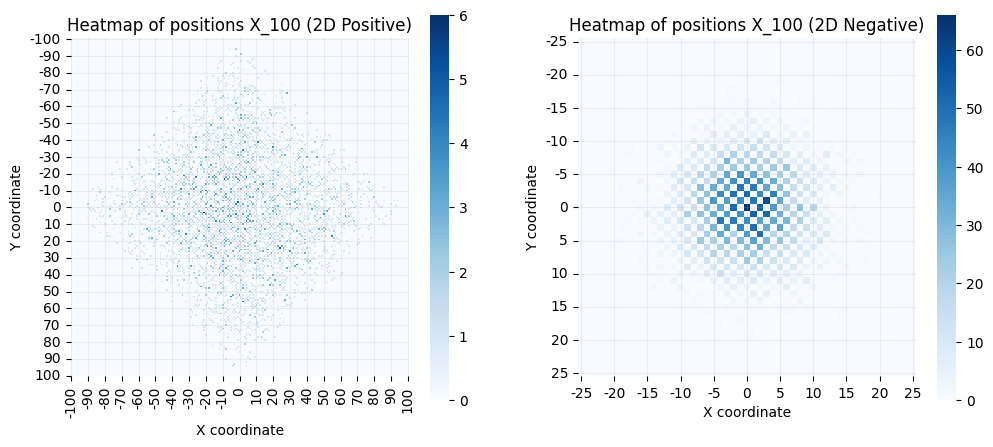

In [269]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#--- positive reinforcement

# Count frequency of each position

positions_t = [tuple(pos) for pos in positive_2d_walks["X_100"]]
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)
grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((201, 201))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[100 - y, x + 100] = val  # invert y for plotting correctly

# Plot using 
sns.heatmap(heatmap, cmap='Blues', ax = axes[0], cbar=True, square=True)
axes[0].set_xticks(np.arange(210)[::10] + 0.5, np.arange(-100, 110, 10))
axes[0].set_yticks(np.arange(210)[::10] + 0.5, np.arange(100, -110, -10))


### ---- negative

# Count frequency of each position

positions_t = [tuple(pos) for pos in negative_2d_walks["X_100"]]
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)
grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((51, 51))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[25 - y, x + 25] = val  # invert y for plotting correctly

# Plot using 
sns.heatmap(heatmap, cmap='Blues', ax = axes[1], cbar=True, square=True)
axes[1].set_xticks(np.arange(55)[::5] + 0.5, np.arange(-25, 30, 5))
axes[1].set_yticks(np.arange(55)[::5] + 0.5, np.arange(25, -30, -5))


### -- more customization

axes[0].set_title(f"Heatmap of positions X_100 (2D Positive)")
axes[1].set_title(f"Heatmap of positions X_100 (2D Negative)")

for ax in axes:
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    ax.grid(alpha=0.2)
    ax.invert_yaxis()

plt.show()


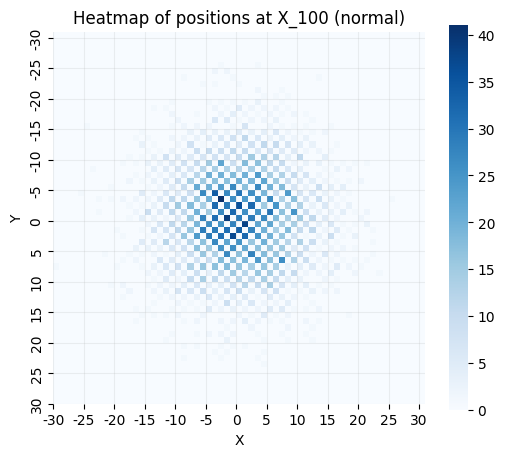

In [270]:
### ---- normal

# Count frequency of each position

positions_t = [tuple(pos) for pos in normal_2d_walks["X_100"]]
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)
grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1


heatmap = np.zeros((61, 61))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[30 - y, x +30] = val  # invert y for plotting correctly

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap, cmap='Blues', cbar=True, square=True)
plt.title(f"Heatmap of positions at X_100 (normal)")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.arange(65)[::5], np.arange(-30, 35, 5))
plt.yticks(np.arange(65)[::5], np.arange(30, -35, -5))
plt.gca().invert_yaxis()
plt.grid(alpha=0.2)
plt.show()

### Calculating the return probabilities

In [221]:
def first_match_index_2d(row):
    for i, point in enumerate(row[1:], start=1):  # start=1 to offset skipping the first
        if np.array_equal(point, [0, 0]):
            return int(i)
    return None

In [272]:
first_match_indices_2d_normal = normal_2d_walks.apply(first_match_index_2d, axis=1)
first_match_indices_2d_positive = positive_2d_walks.apply(first_match_index_2d, axis=1)
first_match_indices_2d_negative = negative_2d_walks.apply(first_match_index_2d, axis=1)

In [298]:
normal_2d_walks

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_9991,X_9992,X_9993,X_9994,X_9995,X_9996,X_9997,X_9998,X_9999,X_10000
0,"[0, 0]","[0, -1]","[-1, -1]","[-1, -2]","[-2, -2]","[-3, -2]","[-2, -2]","[-3, -2]","[-3, -1]","[-3, -2]",...,"[53, 32]","[53, 33]","[53, 34]","[53, 33]","[52, 33]","[52, 34]","[53, 34]","[53, 33]","[53, 34]","[53, 35]"
1,"[0, 0]","[-1, 0]","[-2, 0]","[-3, 0]","[-2, 0]","[-2, 1]","[-3, 1]","[-4, 1]","[-3, 1]","[-3, 2]",...,"[-11, 56]","[-12, 56]","[-12, 57]","[-11, 57]","[-10, 57]","[-11, 57]","[-11, 58]","[-12, 58]","[-12, 59]","[-12, 58]"
2,"[0, 0]","[0, 1]","[1, 1]","[0, 1]","[1, 1]","[1, 0]","[2, 0]","[3, 0]","[3, 1]","[4, 1]",...,"[-21, 12]","[-22, 12]","[-23, 12]","[-23, 13]","[-23, 12]","[-23, 13]","[-23, 14]","[-22, 14]","[-22, 13]","[-21, 13]"
3,"[0, 0]","[1, 0]","[0, 0]","[0, -1]","[0, -2]","[0, -3]","[1, -3]","[1, -4]","[1, -3]","[0, -3]",...,"[65, -8]","[64, -8]","[64, -9]","[64, -10]","[63, -10]","[63, -11]","[62, -11]","[62, -12]","[63, -12]","[64, -12]"
4,"[0, 0]","[0, 1]","[1, 1]","[0, 1]","[0, 0]","[-1, 0]","[-2, 0]","[-3, 0]","[-4, 0]","[-4, 1]",...,"[-126, 19]","[-126, 18]","[-125, 18]","[-125, 19]","[-126, 19]","[-126, 20]","[-126, 21]","[-127, 21]","[-127, 22]","[-126, 22]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"[0, 0]","[-1, 0]","[-1, -1]","[-2, -1]","[-1, -1]","[-2, -1]","[-2, -2]","[-3, -2]","[-4, -2]","[-3, -2]",...,"[38, -99]","[38, -100]","[38, -99]","[39, -99]","[40, -99]","[39, -99]","[39, -100]","[39, -101]","[39, -100]","[40, -100]"
4996,"[0, 0]","[0, 1]","[1, 1]","[1, 0]","[0, 0]","[0, -1]","[1, -1]","[1, 0]","[1, -1]","[2, -1]",...,"[35, 78]","[34, 78]","[33, 78]","[34, 78]","[34, 79]","[34, 80]","[35, 80]","[35, 81]","[36, 81]","[37, 81]"
4997,"[0, 0]","[0, -1]","[0, -2]","[-1, -2]","[-1, -1]","[0, -1]","[1, -1]","[2, -1]","[2, -2]","[2, -1]",...,"[19, -4]","[19, -3]","[20, -3]","[19, -3]","[19, -2]","[18, -2]","[17, -2]","[18, -2]","[19, -2]","[18, -2]"
4998,"[0, 0]","[0, -1]","[1, -1]","[0, -1]","[0, 0]","[-1, 0]","[-1, -1]","[-1, 0]","[-1, 1]","[-1, 2]",...,"[17, 70]","[17, 69]","[17, 68]","[18, 68]","[18, 67]","[18, 66]","[19, 66]","[19, 67]","[20, 67]","[20, 68]"


In [278]:
first_match_indices_2d_normal

0       4750.0
1       4624.0
2       1516.0
3          2.0
4          4.0
         ...  
4995      36.0
4996       4.0
4997    9238.0
4998       4.0
4999       6.0
Length: 5000, dtype: float64

Text(0, 0.5, 'Frequency')

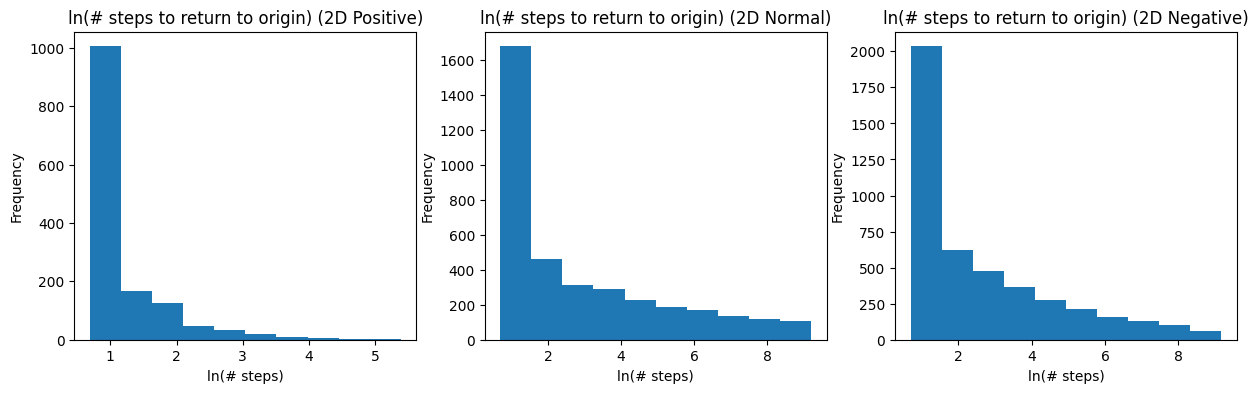

In [273]:
# plot the results as histograms

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

axes[0].hist(np.log(first_match_indices_2d_positive))
axes[0].set_title("ln(# steps to return to origin) (2D Positive)")
axes[0].set_xlabel("ln(# steps)")
axes[0].set_ylabel("Frequency")

axes[1].hist(np.log(first_match_indices_2d_normal))
axes[1].set_title("ln(# steps to return to origin) (2D Normal)")
axes[1].set_xlabel("ln(# steps)")
axes[1].set_ylabel("Frequency")

axes[2].hist(np.log(first_match_indices_2d_negative))
axes[2].set_title("ln(# steps to return to origin) (2D Negative)")
axes[2].set_xlabel("ln(# steps)")
axes[2].set_ylabel("Frequency")

In [299]:
print(first_match_indices_2d_normal.count()/5000)
print(first_match_indices_2d_positive.count()/5000)
print(first_match_indices_2d_negative.count()/5000)

0.7388
0.2836
0.8882


In [263]:
def prop_returned_by_time(first_match_indices, total_num_walks):
    """
    Given a Series returned from first_match_index(), return a list that holds the proportion of walks 
    that have returned to the origin by time i.
    """

    # Get the maximum index at which the origin was travelled back to, to capture all possibilities, but
    # avoid having to search through unnecessary extra steps
    max_val = max(first_match_indices)

    # This is adding 1 to the counter if the first match index is less than each natural number up to max_val
    # In other words, getting the number of walks which have returned for the first time by each natural number index
    # and then converting that into a proportion
    result = [sum(1 for x in first_match_indices if x < i)/total_num_walks for i in range(int(max_val) + 1)]

    return result

In [282]:
result_normal = prop_returned_by_time(first_match_indices_2d_normal.dropna(), 5000)
result_positive = prop_returned_by_time(first_match_indices_2d_positive.dropna(), 5000)
result_negative = prop_returned_by_time(first_match_indices_2d_negative.dropna(), 5000)

Text(0, 0.5, 'Proportion of walks')

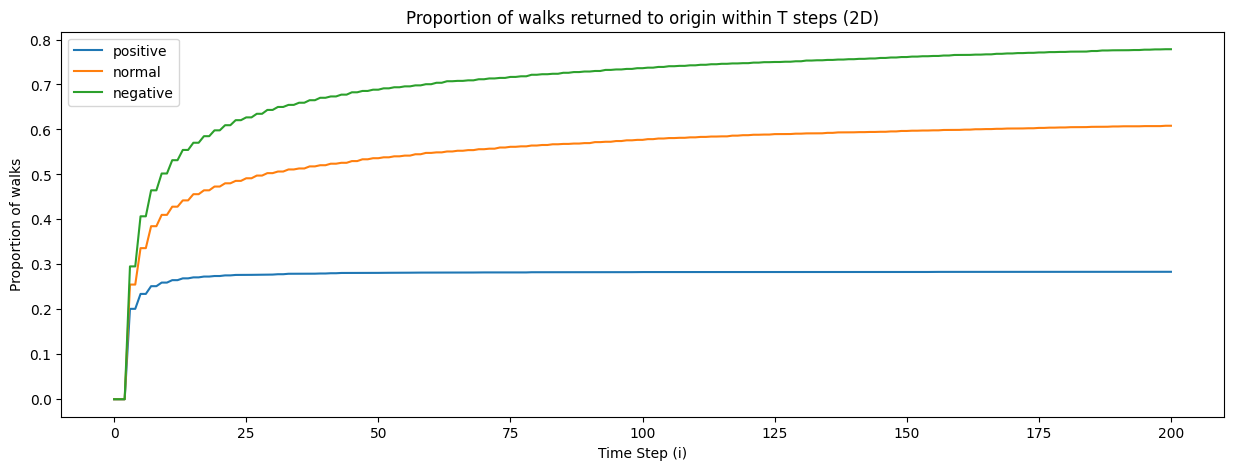

In [283]:
plt.figure(figsize=(15,5))
plt.plot(result_positive[:201], label="positive")
plt.plot(result_normal[:201], label="normal")
plt.plot(result_negative[:201], label="negative")
plt.legend()
plt.title("Proportion of walks returned to origin within T steps (2D)")
plt.xlabel("Time Step (i)")
plt.ylabel("Proportion of walks")

In [291]:
# get power law distributions

# get best_fit line - positive
coefficients = np.polyfit(np.log(range(3,201)), np.log(result_positive[3:201]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

# get best_fit line - normal
coefficients = np.polyfit(np.log(range(3,201)), np.log(result_normal[3:201]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

# get best_fit line - negative
coefficients = np.polyfit(np.log(range(3,201)), np.log(result_negative[3:201]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)


0.0355526693998606 -1.4299322630834777
0.1417252340353029 -1.2107762136312377
0.15200482443546617 -1.0136982684848093


### Calculate number of returns

In [257]:
# need special function for 2d

def count_zeros(row):
    return sum(np.array_equal(point, [0, 0]) for point in row)

Text(0, 0.5, 'Density')

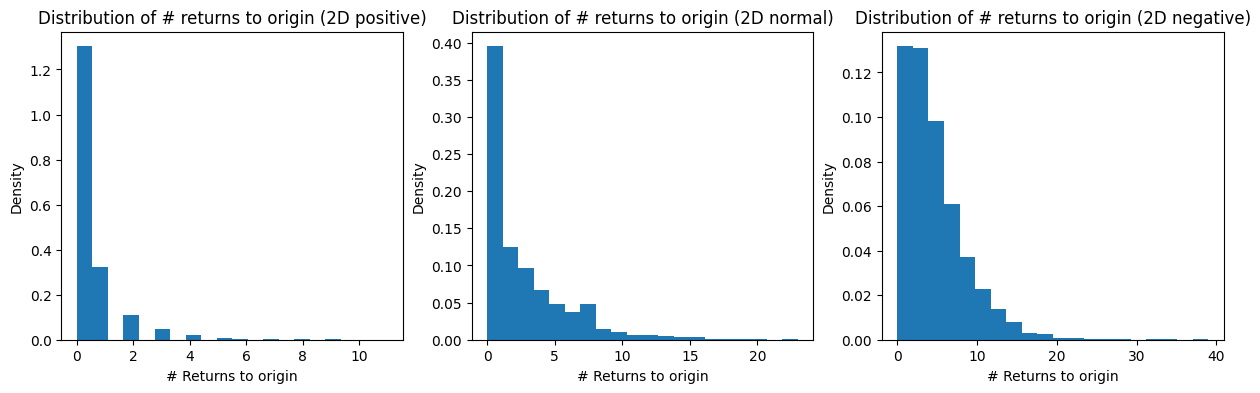

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

zero_count_pos = (positive_2d_walks.iloc[:, 1:]).apply(count_zeros, axis=1)


##################

zero_count_normal = (normal_2d_walks.iloc[:, 1:]).apply(count_zeros, axis=1)


#################333



Text(0, 0.5, 'Density')

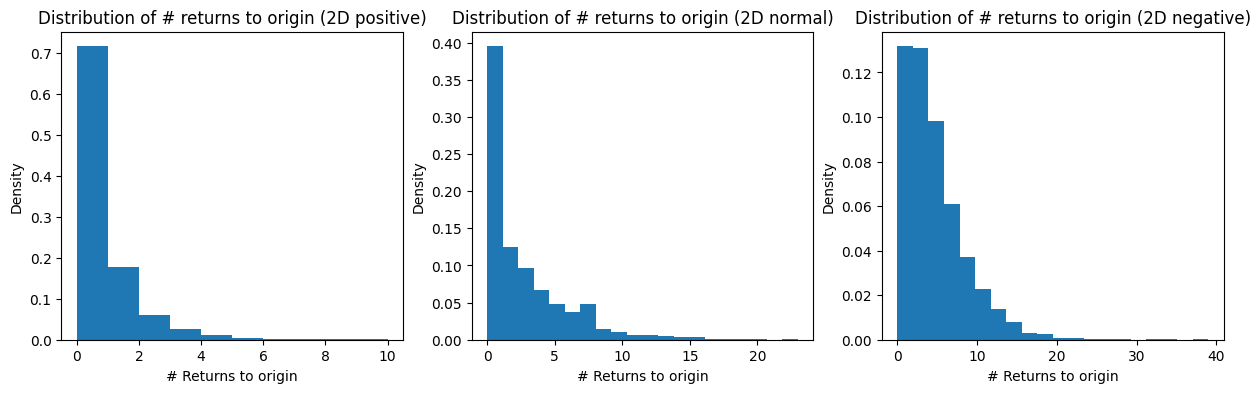

In [289]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

bins=np.arange(0, 11, 1)
axes[0].hist(zero_count_pos, bins=bins, density=True)
axes[0].set_title("Distribution of # returns to origin (2D positive)")
axes[0].set_xlabel("# Returns to origin")
axes[0].set_ylabel("Density")

axes[1].hist(zero_count_normal, bins=20, density=True)
axes[1].set_title("Distribution of # returns to origin (2D normal)")
axes[1].set_xlabel("# Returns to origin")
axes[1].set_ylabel("Density")

axes[2].hist(zero_count_neg, bins=20, density=True)
axes[2].set_title("Distribution of # returns to origin (2D negative)")
axes[2].set_xlabel("# Returns to origin")
axes[2].set_ylabel("Density")

In [286]:
plt.show()

### Compute euclidean distance from coordinates for 2D

In [297]:
## compute euclidean distance

def compute_euclidean_distance(arr):
    return np.sqrt(sum(arr**2))

In [301]:
normal_2d_walks_distance = np.vectorize(compute_euclidean_distance)(normal_2d_walks)


In [309]:
positive_2d_walks_distance = np.vectorize(compute_euclidean_distance)(positive_2d_walks)
negative_2d_walks_distance = np.vectorize(compute_euclidean_distance)(negative_2d_walks)


In [303]:
normal_2d_walks_distance = pd.DataFrame(normal_2d_walks_distance)
normal_2d_walks_distance

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.0,1.0,1.414214,2.236068,2.828427,3.605551,2.828427,3.605551,3.162278,3.605551,...,61.911227,62.433965,62.968246,62.433965,61.587336,62.128898,62.968246,62.433965,62.968246,63.513778
1,0.0,1.0,2.000000,3.000000,2.000000,2.236068,3.162278,4.123106,3.162278,3.605551,...,57.070132,57.271284,58.249464,58.051701,57.870545,58.051701,59.033889,59.228372,60.207973,59.228372
2,0.0,1.0,1.414214,1.000000,1.414214,1.000000,2.000000,3.000000,3.162278,4.123106,...,24.186773,25.059928,25.942244,26.419690,25.942244,26.419690,26.925824,26.076810,25.553865,24.698178
3,0.0,1.0,0.000000,1.000000,2.000000,3.000000,3.162278,4.123106,3.162278,3.000000,...,65.490457,64.498062,64.629715,64.776539,63.788714,63.953108,62.968246,63.150614,64.132675,65.115282
4,0.0,1.0,1.414214,1.000000,0.000000,1.000000,2.000000,3.000000,4.000000,4.123106,...,127.424487,127.279221,126.289350,126.435754,127.424487,127.577427,127.738013,128.724512,128.891427,127.906216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,1.414214,2.236068,1.414214,2.236068,2.828427,3.605551,4.472136,3.605551,...,106.042444,106.976633,106.042444,106.404887,106.775465,106.404887,107.335921,108.268186,107.335921,107.703296
4996,0.0,1.0,1.414214,1.000000,0.000000,1.000000,1.414214,1.000000,1.414214,2.236068,...,85.492690,85.088190,84.693565,85.088190,86.005814,86.925255,87.321246,88.238314,88.639720,89.050547
4997,0.0,1.0,2.000000,2.236068,1.414214,1.000000,1.414214,2.236068,2.828427,2.236068,...,19.416488,19.235384,20.223748,19.235384,19.104973,18.110770,17.117243,18.110770,19.104973,18.110770
4998,0.0,1.0,1.414214,1.000000,0.000000,1.000000,1.414214,1.000000,1.414214,2.236068,...,72.034714,71.063352,70.092796,70.342022,69.375788,68.410526,68.680419,69.641941,69.921384,70.880181


In [314]:
positive_2d_walks_distance = pd.DataFrame(positive_2d_walks_distance)
negative_2d_walks_distance = pd.DataFrame(negative_2d_walks_distance)

In [304]:
# get data of the standard deviation, pandas .std() function does that easily
normal2d_std_list = normal_2d_walks_distance.std().tolist()

In [315]:
pos2d_std_list = positive_2d_walks_distance.std().tolist()
neg2d_std_list = negative_2d_walks_distance.std().tolist()

In [316]:
pos2d_std_list

[0.0,
 0.0,
 0.7353206664890886,
 0.7853428501072068,
 1.0935976912285121,
 1.2285101650728218,
 1.4792821127509108,
 1.63961305582913,
 1.8646030949195644,
 2.0194306672101896,
 2.2327525841498685,
 2.4091092610770386,
 2.6155018262702123,
 2.796095932965528,
 2.98941771321315,
 3.170781019603198,
 3.364339976814388,
 3.534861958091011,
 3.731105139012351,
 3.9220083824122285,
 4.121151869751619,
 4.2983914078201355,
 4.507678494093125,
 4.68941110036053,
 4.886442851247091,
 5.071247185395835,
 5.2515195970047,
 5.433945937663397,
 5.621865867989079,
 5.810337644056424,
 6.013172436543399,
 6.22573905072714,
 6.418647231904243,
 6.6158631761172035,
 6.795456056095923,
 6.983713859914392,
 7.161589493817276,
 7.35339350020169,
 7.538616673464486,
 7.718362592860693,
 7.900478905152222,
 8.093301180983104,
 8.282567626835915,
 8.477073295823875,
 8.678901199033136,
 8.87108020474259,
 9.055720055741732,
 9.235925668393678,
 9.421967994071162,
 9.62067857929978,
 9.810141960558212,
 9.9

In [306]:
normal2d_std_list

[0.0,
 0.0,
 0.7425158902871203,
 0.6933631016349567,
 0.9714110308669841,
 0.977022327702895,
 1.1802047375002336,
 1.1839426398601645,
 1.328103147052509,
 1.3551693503816962,
 1.4792888626699472,
 1.5044038942440736,
 1.6086579430192374,
 1.6542611148436899,
 1.754082634520113,
 1.7703648026614531,
 1.861105217498193,
 1.903516143995719,
 1.988871663621151,
 1.984748374317514,
 2.0604648373855374,
 2.085918375864459,
 2.1437708380538623,
 2.1688514618890933,
 2.230270355186627,
 2.2748217438928138,
 2.346623556852126,
 2.370633488491789,
 2.4322460813586804,
 2.464941533546183,
 2.542643593847227,
 2.5387845644363196,
 2.59187909958276,
 2.6123270548903847,
 2.6583751664999946,
 2.703354659176011,
 2.7615399125281592,
 2.783180916237649,
 2.8197990425551818,
 2.8541052563368567,
 2.891727016252401,
 2.900792187498278,
 2.962299261860644,
 2.9984555758651044,
 3.021311506398879,
 3.058482152163412,
 3.120032910557315,
 3.155338442627701,
 3.200544411412906,
 3.2220970937549454,
 3.24

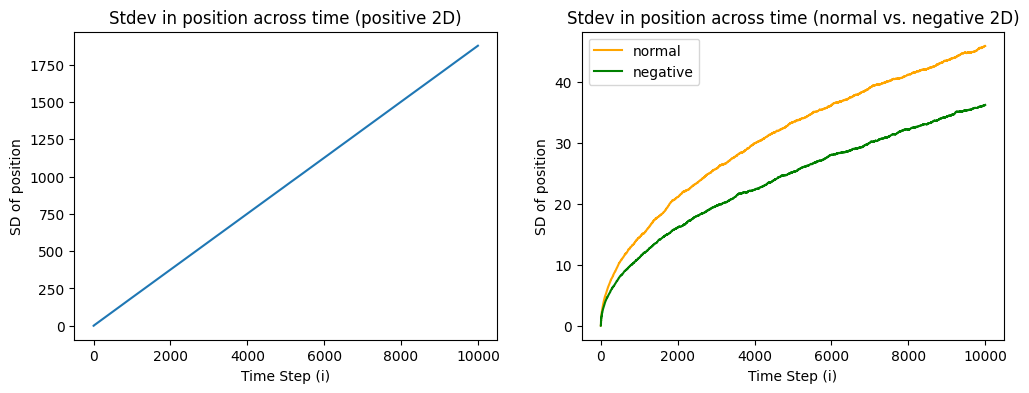

In [320]:
# plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 

axes[0].plot(range(0,10001), pos2d_std_list)
axes[0].set_title("Stdev in position across time (positive 2D)")
axes[0].set_xlabel("Time Step (i)")
axes[0].set_ylabel("SD of position")

axes[1].plot(range(0,10001), normal2d_std_list, label = "normal", color = "orange")
axes[1].plot(range(0,10001), neg2d_std_list, label = "negative", color = "green")
axes[1].set_title("Stdev in position across time (normal vs. negative 2D)")
axes[1].set_xlabel("Time Step (i)")
axes[1].set_ylabel("SD of position")

plt.legend()

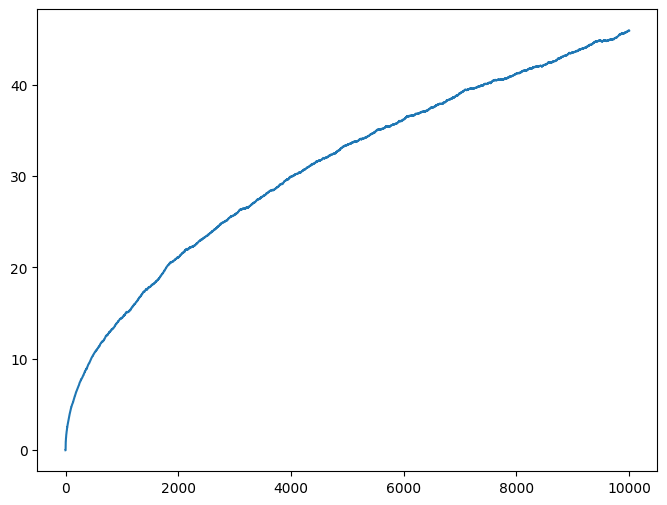

In [310]:
plt.figure(figsize=(8,6))
plt.plot(range(0,10001), normal2d_std_list)

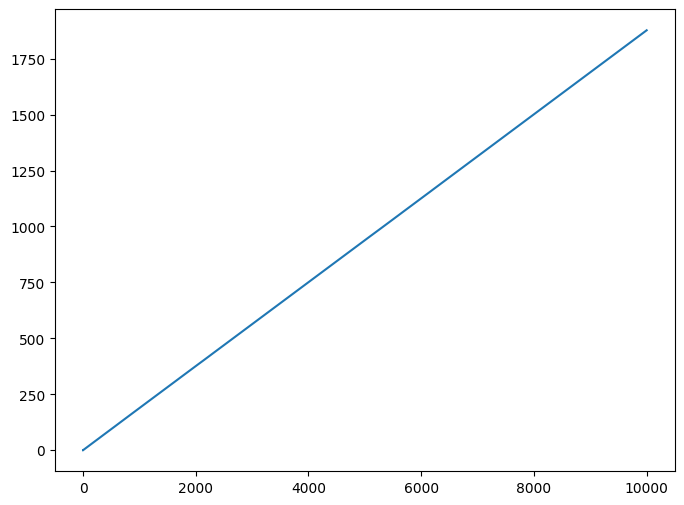

In [317]:
plt.figure(figsize=(8,6))
plt.plot(range(0,10001), pos2d_std_list)

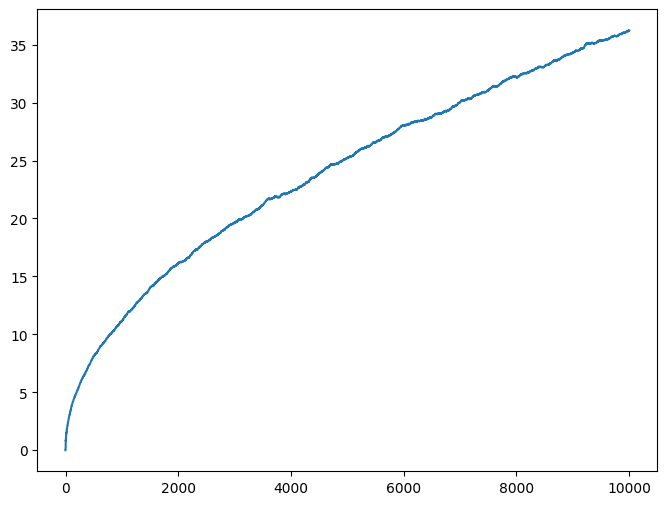

In [318]:
plt.figure(figsize=(8,6))
plt.plot(range(0,10001), neg2d_std_list)

In [322]:
coefficients = np.polyfit(np.log(range(3,10001)), np.log(normal2d_std_list[3:]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

coefficients = np.polyfit(np.log(range(3,10001)), np.log(neg2d_std_list[3:]), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

0.49886806797554983 -0.7551649824514922
0.5002561701513369 -1.0270992143717543
